# Tarea 2
## Punto 1
### Regresión lineal y K mean Clustering
#### Juan Diego Arango, David Bernal

In [1]:
# Importación de paquetes de python
%pylab inline
import pandas as pd
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


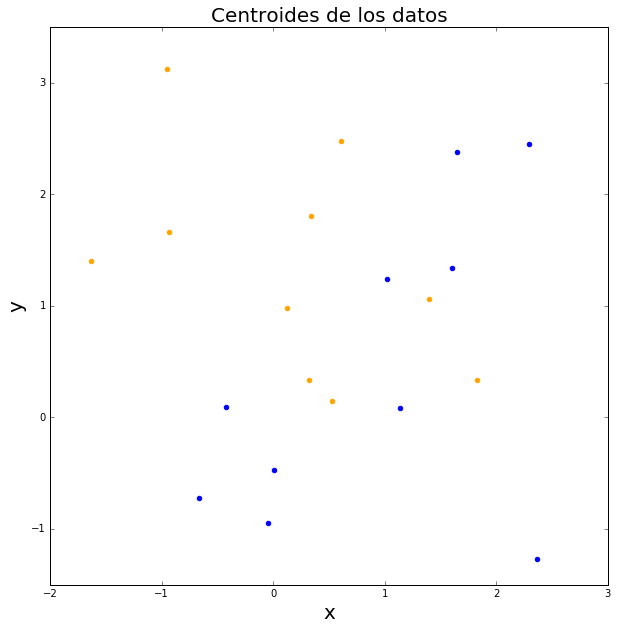

In [2]:
# Centros de las distribuciones de centroides
blue_centre = [1, 0]
orange_centre = [0, 1]

# Matriz de covarianza de las dos distribuciones de centroides
Sigma = np.asarray([[1, 0], [0, 1]])

# Generación de los centroides
bluecentroids = np.random.multivariate_normal(blue_centre, Sigma, 10).T
orangecentroids = np.random.multivariate_normal(orange_centre, Sigma, 10).T

#Figura con los centroides
plt.scatter(bluecentroids[0,:],bluecentroids[1,:],color='blue')
plt.hold('true')
plt.scatter(orangecentroids[0,:],orangecentroids[1,:],color='orange')
plt.axis('equal')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Centroides de los datos', fontsize=20)
plt.show()

In [3]:
# Función de generación de observaciones
def observation_generator(means,sigma,number):
    D=np.zeros((number,len(means)))
    for i in range(number):
        D[i,:] = np.squeeze(np.asarray(np.random.multivariate_normal(means[:,random.randint(len(means[0]))], sigma, 1).T))
    return D

In [4]:
# Función de generación de poblaciones, que llama la función de generación de observaciones generando puntos
# eligiendo al azar un centroide y con matriz de covarianza sigma/5 se generan los puntos aleatorios
def population_generator(number):
    blue = np.concatenate((observation_generator(bluecentroids, Sigma/5.0, number),np.zeros((number,1))), 1)
    orange = np.concatenate((observation_generator(orangecentroids, Sigma/5.0, number),np.ones((number,1))), 1)
    observations = pd.DataFrame(np.concatenate((blue,orange)))
    return observations

In [5]:
# Generación de las muestras de entrenamiento (100 puntos) y de prueba (5000 puntos)
training_sample=population_generator(100)
test_sample=population_generator(5000)

In [6]:
# Función de gráficas de las poblaciones
def plot_population(pop):
    colors = ['blue', 'orange'] # Se va a hacer un ciclo en estos colores
    color_index = 0
    grouped_plot_data = pop.groupby(2)
    for group in grouped_plot_data:
        color = colors[color_index]
        group_data = group[1]
        plt.scatter(group_data[0],group_data[1], color=color, alpha=0.8)
        plt.hold('true')
        color_index += 1
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.show()

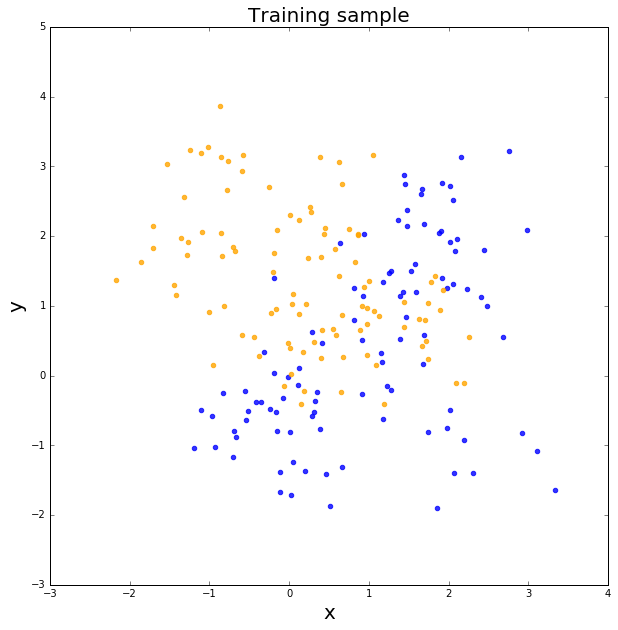

In [7]:
figure = plt.figure(figsize=(10, 10))
title('Training sample', fontsize=20)
plot_population(training_sample)

In [8]:
# Función que genera la malla para poner la muestra clasificada
def grid_generator(training,test,grid_size):
    x = np.linspace(min(min(training[0]),min(test[0])),max(max(training[0]),max(test[0])),num=grid_size)
    y = np.linspace(min(min(training[1]),min(test[1])),max(max(training[1]),max(test[1])),num=grid_size)
    xx,yy = np.meshgrid(x,y)
    return xx,yy

In [9]:
# Se genera la malla con 100 puntos
xx,yy=grid_generator(training_sample,test_sample,100)

# Se define el modelo de regresión lineal
reg=linear_model.LinearRegression()

In [10]:
# Función que a partir de la regresión lineal multivariable devuelve la pendiente y el intercepto
# de una recta para explicar los datos en un plano xy
def intercept_slope(samp,reg):
    x=samp.as_matrix()
    reg.fit (x[:,[0,1]], x[:,2])
    coefs=reg.coef_
    inter=reg.intercept_
    slope=-coefs[0]/coefs[1]
    intercept=-(inter-0.5)/coefs[1]
    return intercept, slope

In [11]:
# Función que asigna a los valores de la malla un color de acuerdo a la regresión lineal
def linear_grid(x,y,reg):
    coefs=reg.coef_
    inter=reg.intercept_
    val  = inter + coefs[0]*x + coefs[1]*y
    x1=x[(np.where(val<=0.5))]
    y1=y[(np.where(val<=0.5))]
    x2=x[(np.where(val>0.5))]
    y2=y[(np.where(val>0.5))]
    return x1,y1,x2,y2

In [12]:
# Función que genera la gráfica para el método de regresión lineal
def plot_linear(samp,test,reg):
    inter, slope = intercept_slope(samp,reg)
    x = np.linspace(min(samp[0])-0.5,max(samp[0])+0.5)
    y = inter + slope * x
    plot(x,y,color='red')
    xb,yb,xo,yo = linear_grid(xx,yy,reg)
    scatter(xb,yb,s=5,alpha=0.2,color='blue')
    scatter(xo,yo,s=5,alpha=0.2,color='orange')
    xlim(min(samp[0])-0.5,max(samp[0])+0.5)
    ylim(min(samp[1])-0.5,max(samp[1])+0.5)
    plot_population(test)

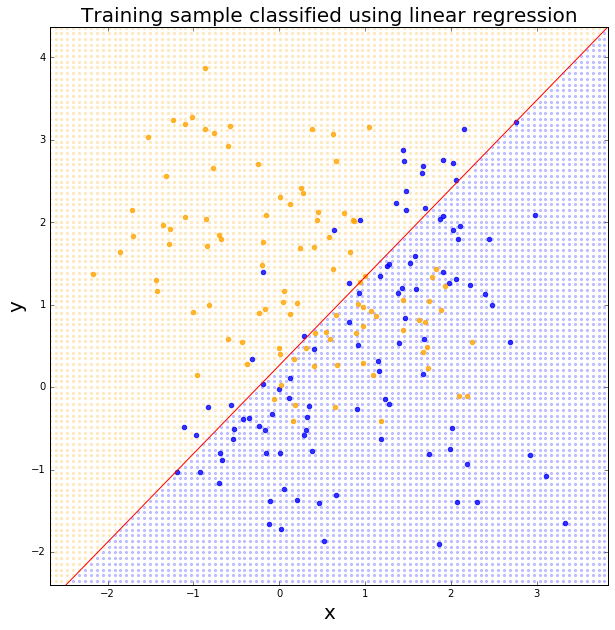

In [13]:
figure = plt.figure(figsize=(10, 10))
title('Training sample classified using linear regression', fontsize=20)
plot_linear(training_sample,training_sample,reg)
figure.savefig('Figure 2.1', format='pdf')

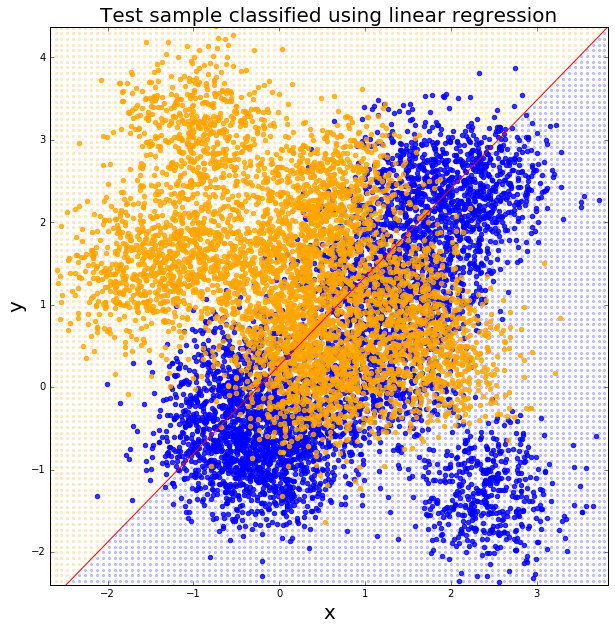

In [14]:
figure = plt.figure(figsize=(10, 10))
title('Test sample classified using linear regression', fontsize=20)
plot_linear(training_sample,test_sample,reg)

In [15]:
# Función que calcula el error de la regresión lineal
def linear_error(samp,test,reg):
    pob=test.as_matrix()
    z=pob[:,2]
    x=samp.as_matrix()
    sx=pob[:,0]
    sy=pob[:,1]
    reg.fit (x[:,[0,1]], x[:,2])
    coefs=reg.coef_
    inter=reg.intercept_
    val  = inter + coefs[0]*sx + coefs[1]*sy
    val = val > 0.5
    diff = 1.0*(z!=val)
    erro = sum(diff)/len(z)
    return erro

In [16]:
lin_train_err=linear_error(training_sample,training_sample,reg)
lin_test_err=linear_error(training_sample,test_sample,reg)
print 'Error de regresión lineal sobre la muestra de entrenamiento', lin_train_err
print 'Error de regresión lineal sobre la muestra de prueba', lin_test_err

Error de regresión lineal sobre la muestra de entrenamiento 0.295
Error de regresión lineal sobre la muestra de prueba 0.3215


In [17]:
# Función que asigna a los valores de la malla un color de acuerdo al método de K vecinos
def KNN_grid(x,y,Z):
    x1=x[(np.where(Z<=0.5))]
    y1=y[(np.where(Z<=0.5))]
    x2=x[(np.where(Z>0.5))]
    y2=y[(np.where(Z>0.5))]
    return x1,y1,x2,y2

In [18]:
# Función que calcula la clásificación con el método de K vecinos
def KNN(samp,test,neigh):
    clf=KNeighborsClassifier(neigh)
    pop=test.as_matrix()
    x=samp.as_matrix()
    clf.fit (x[:,[0,1]], x[:,2])
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    xb,yb,xo,yo = KNN_grid(xx,yy,Z)
    scatter(xb,yb,s=5,alpha=0.2,color='blue')
    scatter(xo,yo,s=5,alpha=0.2,color='orange')
    xlim(min(samp[0])-0.5,max(samp[0])+0.5)
    ylim(min(samp[1])-0.5,max(samp[1])+0.5)
    contourf(xx, yy, Z, alpha=0.5, levels=[0,0.5,1])
    plot_population(test)

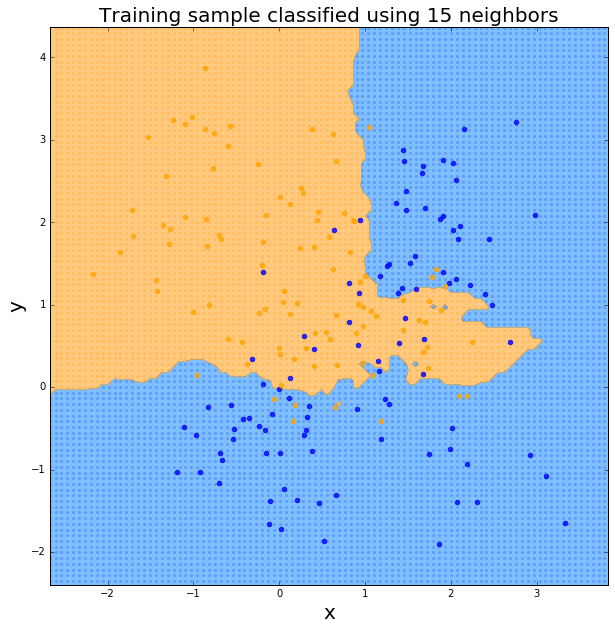

In [19]:
figure = plt.figure(figsize=(10, 10))
title('Training sample classified using 15 neighbors', fontsize=20)
KNN(training_sample,training_sample,15)
figure.savefig('Figure 2.2', format='pdf')

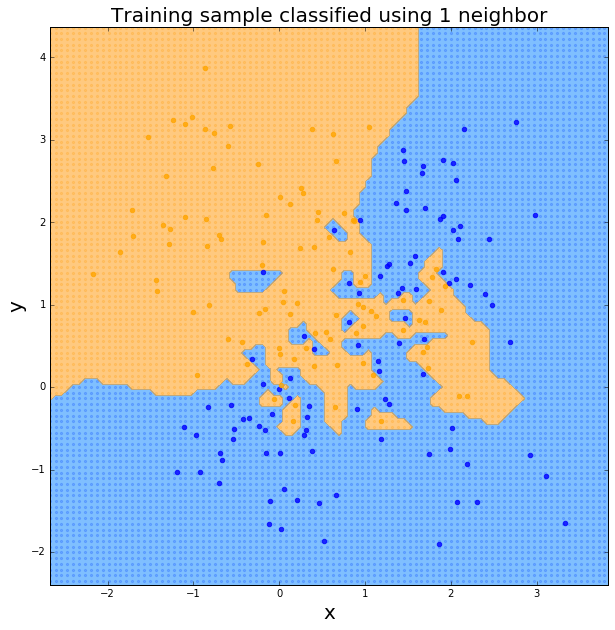

In [20]:
figure = plt.figure(figsize=(10, 10))
title('Training sample classified using 1 neighbor', fontsize=20)
KNN(training_sample,training_sample,1)
figure.savefig('Figure 2.3', format='pdf')

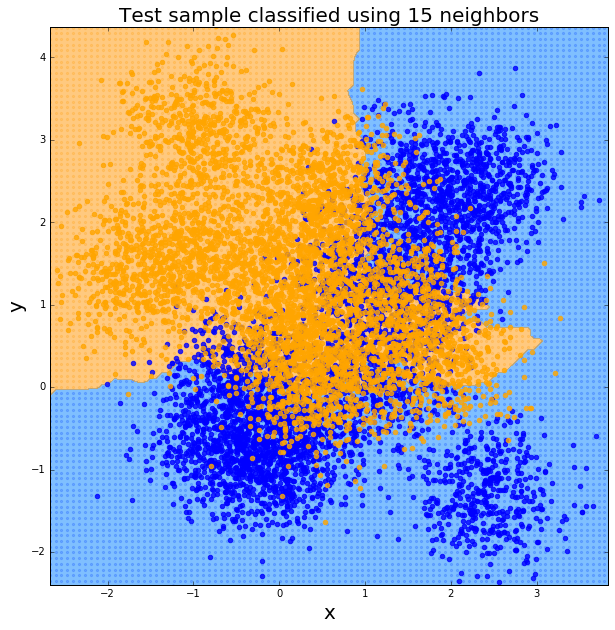

In [21]:
figure = plt.figure(figsize=(10, 10))
title('Test sample classified using 15 neighbors', fontsize=20)
KNN(training_sample,test_sample,15)

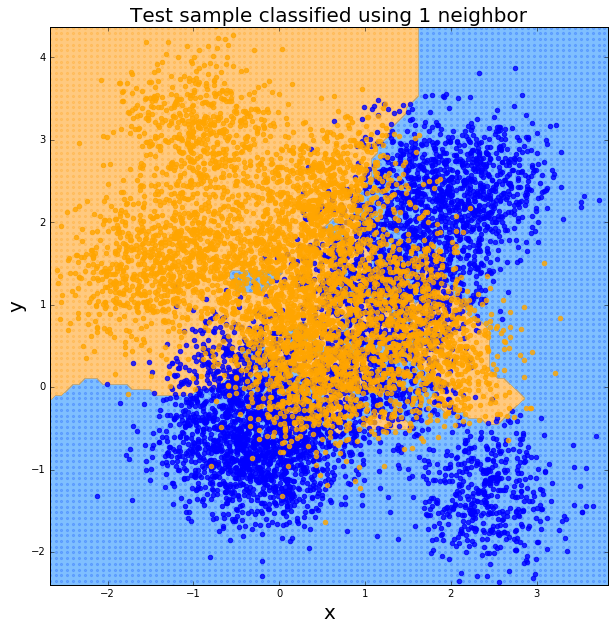

In [22]:
figure = plt.figure(figsize=(10, 10))
title('Test sample classified using 1 neighbor', fontsize=20)
KNN(training_sample,test_sample,1)

In [23]:
# Función que calcula el error del método de K vecinos
def KNN_error(samp,test,neigh):
    pop=test.as_matrix()
    x=samp.as_matrix()
    clf=KNeighborsClassifier(neigh)
    clf.fit (x[:,[0,1]], x[:,2])
    sco = clf.score (pop[:,[0,1]], pop[:,2])
    erro = 1.0 - sco
    return erro

In [24]:
# Definición de arrays con errores y grados de libertad
n=len(training_sample)-1
train_errors=np.zeros(n)
test_errors=np.zeros(n)
dof=np.zeros(n)
for i in range(1,n+1):
    train_errors[i-1]=KNN_error(training_sample,training_sample,i)
    test_errors[i-1]=KNN_error(training_sample,test_sample,i)
    dof[i-1]=len(training_sample)/i

In [25]:
# Se define el modelo de Bayes
gnb = GaussianNB()

In [26]:
# Función que calcula el error del método Bayesiano
def Bay_error(samp,gnb):
    x=samp.as_matrix()
    val=gnb.fit (x[:,[0,1]], x[:,2]).predict(x[:,[0,1]])
    z=x[:,2]
    val = val > 0.5
    diff = 1.0*(z!=val)
    erro = sum(diff)/len(z)
    return erro

In [27]:
# Calculo del  error bayesiano de la muestra de entrenamiento
bay_err=Bay_error(training_sample,gnb)

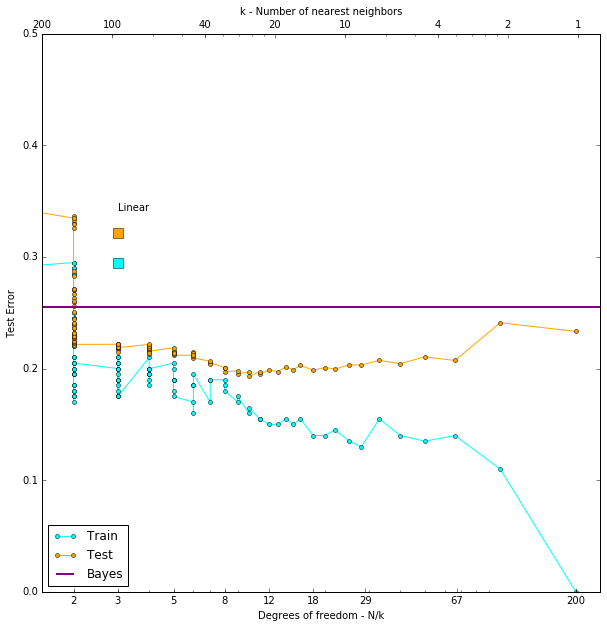

In [28]:
figure, ax1 = plt.subplots()
train, = plt.semilogx(dof,train_errors,label='Train',marker='o',markersize=4,c='cyan')
test, = plt.semilogx(dof,test_errors,label='Test',marker='o',markersize=4,c='orange')
bayes, = plt.semilogx([0.7,251],[bay_err,bay_err],label='Bayes',c='purple',linewidth=2)
trainlin, = plt.semilogx(3,lin_train_err,'s',markersize=10,c='cyan')
trainlin, = plt.semilogx(3,lin_test_err,'s',markersize=10,c='orange')
plt.xlabel('Degrees of freedom - N/k')
plt.ylabel('Test Error')
ax1.set_xscale('log')
ax1.set_xticks([1,2,3,5,8,12,18,29,67,200])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.text(3,lin_test_err+0.02,'Linear')
plt.xlim((1.5,250))
ax2 = ax1.twiny()
new_tick_locations = np.array([1,2,5,10,20,50,100,200])

def tick_function(X):
    V = 200/(X)
    return ["%.0f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("k - Number of nearest neighbors")
legend(handles=[train, test, bayes], loc=3)
figure.savefig('Figure 2.4', format='pdf')

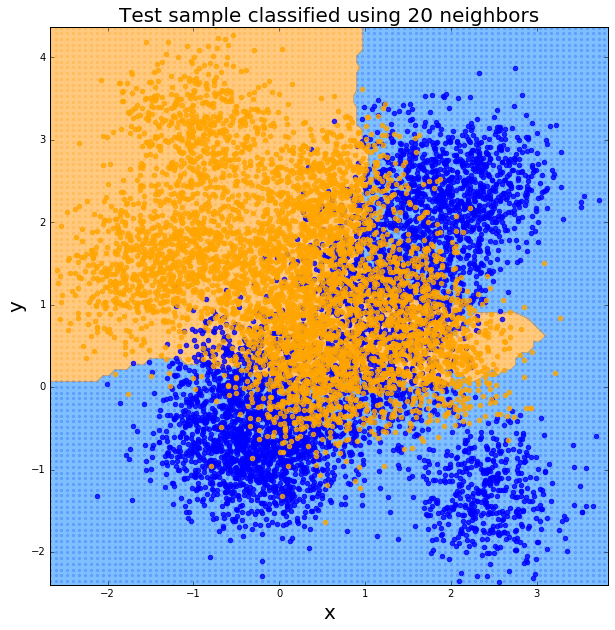

El número de vecinos que mejor ajusta la muestra de prueba 20
El mínimo error sobre la muestra de prueba usando el método de K vecinos es 0.1967


In [29]:
# Definición del mejor número de vecinos para la muestra
best_k=int(len(training_sample)/(dof[(test_errors==min(test_errors))][0]))
best_k_error=KNN_error(training_sample,test_sample,best_k)
figure = plt.figure(figsize=(10, 10))
title('Test sample classified using '+ str(best_k) + ' neighbors', fontsize=20)
KNN(training_sample,test_sample,best_k)

print 'El número de vecinos que mejor ajusta la muestra de prueba', best_k
print 'El mínimo error sobre la muestra de prueba usando el método de K vecinos es', best_k_error